In [2]:
from qutip import *
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt

In [68]:
Omega0 = 1.0
delPrime = 0.0

def psi(g,e):
    return np.array([g, e])

def pulse(t, Omega0, delPrime):
    Omega = np.sqrt(Omega0**2 + delPrime**2)
    
    return np.array([[np.cos(Omega*t/2.0) -(1.0j*delPrime/Omega)*np.sin(Omega*t/2.0), (1.0j*Omega0/Omega)*np.sin(Omega*t/2.0)],
             [(1.0j*Omega0/Omega)*np.sin(Omega*t/2.0) , np.cos(Omega*t/2.0) + (1.0j*delPrime/Omega)*np.sin(Omega*t/2.0)]])

def pulse1(t, Omega0, delPrime, phi0, phi1):
    Omega = np.sqrt(Omega0**2 + delPrime**2)
    
    if Omega == 0.0:
        U = np.array([[1.0 , 0.0],
                      [0.0 , 1.0]])
        
    else:
        U = np.array([[np.cos(Omega*t/2.0) -(1.0j*delPrime/Omega)*np.sin(Omega*t/2.0), (1.0j*Omega0/Omega)*np.sin(Omega*t/2.0)],
                     [(1.0j*Omega0/Omega)*np.sin(Omega*t/2.0) , np.cos(Omega*t/2.0) + (1.0j*delPrime/Omega)*np.sin(Omega*t/2.0)]])
    
    V1 = np.array([[1.0 , 0.0],
                   [0.0 , np.exp(-1.0j*phi1)]])
    
    V0 = np.array([[1.0 , 0.0],
                   [0.0 , np.exp(1.0j*phi0)]])
    
    return np.exp(1.0j*delPrime*t/2.0)*V1@U@V0

def rhoee(psi):
    return abs(psi[1])

def rhogg(psi):
    return abs(psi[0])

def phi(psi):
    phi0 = math.atan2(np.real(psi[0]),np.imag(psi[0]))
    phi1 = math.atan2(np.real(psi[1]),np.imag(psi[1]))
    return (phi0-phi1)

def blochVec(psi):
    w = rhogg(psi) - rhoee(psi)  #pointed up is ground state
    if abs(w)>1.0:
        w = float(round(w))
    x = np.sin(np.arccos(w))*np.cos(phi(psi))
    y = np.sin(np.arccos(w))*np.sin(phi(psi))
    return np.array([x,y,w])

**Ex 1)** Start with an system in the ground state and then apply a $\pi$ pulse.

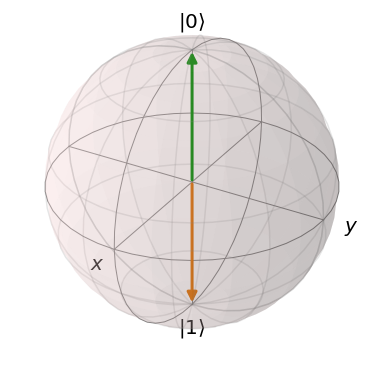

In [61]:
psi0 = psi(1.0, 0.0)
piPulse = pulse1(np.pi, 1.0, 0.0, 0.0, 0.0)
psi1 = piPulse@psi0

b = Bloch()
b.add_vectors(blochVec(psi0))
b.add_vectors(blochVec(psi1))
b.show()

**Ex 2)** Now again we'll start with the system in the ground state but do a Ramsey sequence. 

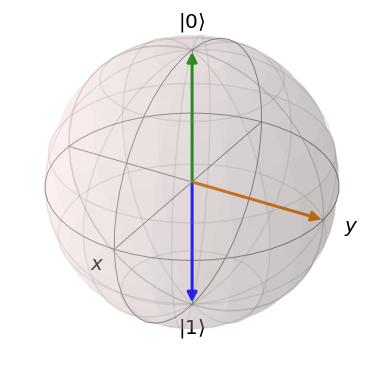

In [62]:
psi0 = psi(1.0, 0.0)
pi2Pulse = pulse1(np.pi/2.0, 1.0, 0.0, 0.0, 0.0)
psi1 = pi2Pulse@psi0
psi2 = pi2Pulse@psi1

b = Bloch()
b.add_vectors(blochVec(psi0))
b.add_vectors(blochVec(psi1))
b.add_vectors(blochVec(psi2))
b.show()

**Ex 3)** Maybe now a $\pi$ pulse with some detuning.

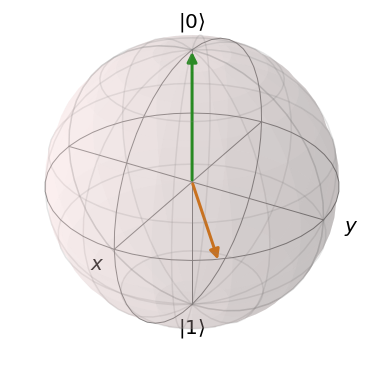

In [63]:
psi0 = psi(1.0, 0.0)
piPulse = pulse1(np.pi, 1.0, 0.1, 0.0, 0.0)
psi1 = piPulse@psi0

b = Bloch()
b.add_vectors(blochVec(psi0))
b.add_vectors(blochVec(psi1))
b.show()

And if you try to bring it back up with the same pulse:

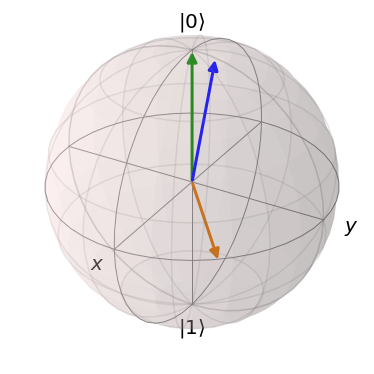

In [64]:
psi2 = piPulse@psi1
b.add_vectors(blochVec(psi2))
b.show()

**Ex 4)** Now a Ramsey sequence with different detunings during the pulses and the free evolution time. First, no detuning during the dark time. 

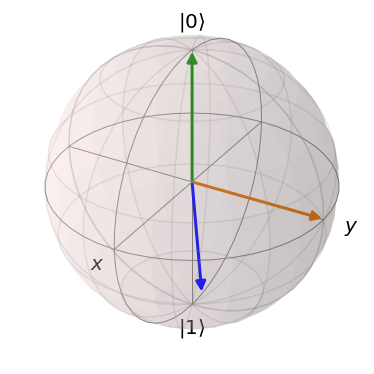

In [66]:
delPrime = 0.01    #detuning during pulse

psi0 = psi(1.0, 0.0)
pi2Pulse = pulse1(np.pi/2.0, 1.0, delPrime, 0.0, 0.0)
psi1 = pi2Pulse@psi0
psi2 = pi2Pulse@psi1

b = Bloch()
b.add_vectors(blochVec(psi0))
b.add_vectors(blochVec(psi1))
b.add_vectors(blochVec(psi2))
b.show()

Now we'll add some detuning $\delta$ during the dark time. I'll let the free evolution time be such that $\tau\delta = \frac{\pi}{4}$

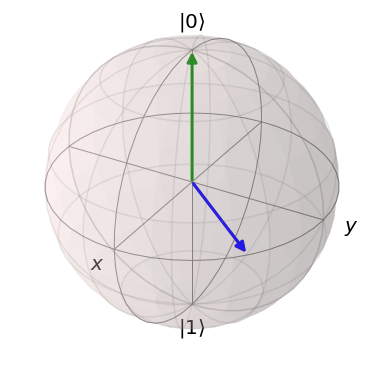

In [85]:
delta = 1.0       #detuning during dark time
delPrime = 0.1   #detuning during pulse
Omega0 = 1.0

freeEvo = pulse1(np.pi/(delta*4.0), 0.0, delta, 0.0, np.pi/4.0)
pi2Pulse = pulse1(np.pi/(2.0*np.sqrt(delPrime**2 + Omega0**2)), Omega0, delPrime, np.pi/4.0, np.pi/4.0)
psi0 = psi(1.0, 0.0)
psi1 = pi2Pulse@psi0
psi2 = freeEvo@psi1
psi3 = pi2Pulse@psi2

b = Bloch()
b.add_vectors(blochVec(psi0)) #green
b.add_vectors(blochVec(psi1)) #yellow
b.add_vectors(blochVec(psi2)) #blue
#b.add_vectors(blochVec(psi3)) #red
#b.view = [90,0]
b.show()

**Ex 5)** Hyper Ramsey sequence

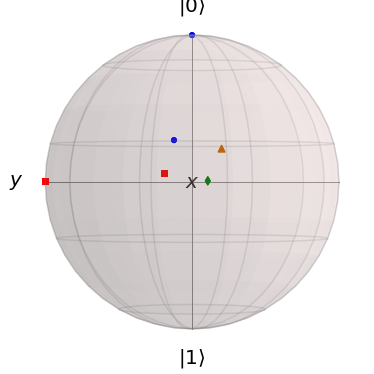

In [59]:
delta = 0.1
Omega0 = 1.0

pi2Pulse = pulse(np.pi/(2.0*np.sqrt(delta**2 + Omega0**2)), Omega0, delta)
pi2PhaseInject = pulse(np.pi/2.0, 0.0, 1.0)

psi0 = psi(1.0, 0.0)
psi1 = pi2Pulse@psi0
psi2 = pi2PhaseInject@psi1
psi3 = pulse(np.pi/2.0, Omega0, 0.2)@psi2
psi4 = pulse(np.pi/2.0, Omega0, 0.2)@psi3
psi5 = pulse(np.pi/2.0, Omega0, 0.2)@psi4

b = Bloch()
#b.add_vectors(blochVec(psi0)) #green
#b.add_vectors(blochVec(psi1)) #yellow
#b.add_vectors(blochVec(psi2)) #blue
#b.add_vectors(blochVec(psi3))

b.add_points(blochVec(psi0)) #blue
b.add_points(blochVec(psi1)) #red
b.add_points(blochVec(psi2)) #green
b.add_points(blochVec(psi3)) #yellow
b.add_points(blochVec(psi4)) #blue
b.add_points(blochVec(psi5)) #red

b.view = [90,0]               #[azimuthal, elevation]
b.show()

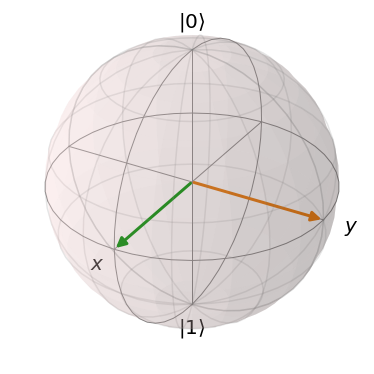

In [90]:
psi0 = psi(np.sqrt(2.0)/2.0, np.sqrt(2.0)/2.0)

#def pulse1(t, Omega0, delPrime, phi0, phi1):
delPrime = 0.1
freeEvo = pulse1(np.pi/(2.0*delPrime), 0.0, delPrime, 0.0, 0.0)

psi1 = freeEvo@psi0

b = Bloch()
b.add_vectors(blochVec(psi0)) #blue
b.add_vectors(blochVec(psi1)) #blue

b.show()